# Desafio 3

Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para isso,
dividiremos este desafio em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
#%matplotlib inline

from IPython.core.pylabtools import figsize
figsize(12, 8)
sns.set()

## Parte 1

### _Setup_ da parte 1

In [3]:
np.random.seed(42)
    
df = pd.DataFrame({"normal": sct.norm.rvs(loc = 20, scale = 4, size=10000), "binomial": sct.binom.rvs(100, 0.2, size=10000)})

## Inicie sua análise a partir da parte 1 a partir daqui

In [4]:
# Sua análise da parte 1 começa aqui.
df.head()

,normal,binomial
0,21.986857,18
1,19.446943,15
2,22.590754,14
3,26.092119,15
4,19.063387,21


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
normal      10000 non-null float64
binomial    10000 non-null int64
dtypes: float64(1), int64(1)
memory usage: 156.3 KB


## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` de `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `binom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

In [7]:
def q1():
    return tuple((df['normal'].quantile(q=[0.25, 0.5, 0.75]) - df['binomial'].quantile(q=[0.25, 0.5, 0.75])).round(3).values)

Para refletir:

* Você esperava valores dessa magnitude?

* Você é capaz de explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?

## Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. Qual a probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda como uma único escalar arredondado para três casas decimais.

In [9]:
def q2():

    media = df['normal'].mean()
    desvio = df['normal'].std()
    x1 = (media - desvio)
    x2 = (media + desvio)

    f = ECDF(df['normal'])
    
    px = f(x2) - f(x1)

    return float(px.round(3))

Para refletir:

* Esse valor se aproxima do esperado teórico? -> Sim, teoricamente, a probabilidade entre a media e 1 desvio padrão é de 68%
* Experimente também para os intervalos $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$.

In [22]:
def calcula_probabilidade(qtddesvio = 1):
    media = df['normal'].mean()
    desvio = df['normal'].std()
    
    x1 = (media - (desvio * qtddesvio))
    x2 = (media + (desvio * qtddesvio))

    f = ECDF(df['normal'])
    
    cdfx1 = f(x1)
    cdfx2 = f(x2)

    px = cdfx2 - cdfx1
    
    print("Qtd. Desvio Padrão: %d" % qtddesvio)
    print("Intervalo: %f < x < %f" % (x1, x2))
    print("Prob Inf %f " % cdfx1)
    print("Prob Sup %f " % cdfx2)

    print("Probabilidade = %f \n" % px)

In [23]:
#1 desvio
calcula_probabilidade()
#2 desvios
calcula_probabilidade(2)
#2 desvios
calcula_probabilidade(3)

Qtd. Desvio Padrão: 1
Intervalo: 15.977607 < x < 24.005306
Prob Inf 0.157100 
Prob Sup 0.840900 
Probabilidade = 0.683800 

Qtd. Desvio Padrão: 2
Intervalo: 11.963757 < x < 28.019155
Prob Inf 0.022700 
Prob Sup 0.976500 
Probabilidade = 0.953800 

Qtd. Desvio Padrão: 3
Intervalo: 7.949908 < x < 32.033005
Prob Inf 0.001200 
Prob Sup 0.998500 
Probabilidade = 0.997300 



## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [11]:
def q3():
    return ((df['binomial'].mean() - df['normal'].mean()).round(3), (df['binomial'].var() - df['normal'].var()).round(3))

Para refletir:

* Você esperava valore dessa magnitude? -> Eu havia plotado os histogramas, então tinha essa noção visualmente 
* Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`? -> Quando se diminui o n, 

## Parte 2

### _Setup_ da parte 2

In [24]:
stars = pd.read_csv("HTRU_2.csv")

stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

## Inicie sua análise da parte 2 a partir daqui

In [25]:
# Sua análise da parte 2 começa aqui.
stars.head()

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve,target
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,False
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,False
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,False
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,False
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,False


In [26]:
stars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17897 entries, 0 to 17896
Data columns (total 9 columns):
mean_profile    17897 non-null float64
sd_profile      17897 non-null float64
kurt_profile    17897 non-null float64
skew_profile    17897 non-null float64
mean_curve      17897 non-null float64
sd_curve        17897 non-null float64
kurt_curve      17897 non-null float64
skew_curve      17897 non-null float64
target          17897 non-null bool
dtypes: bool(1), float64(8)
memory usage: 1.1 MB


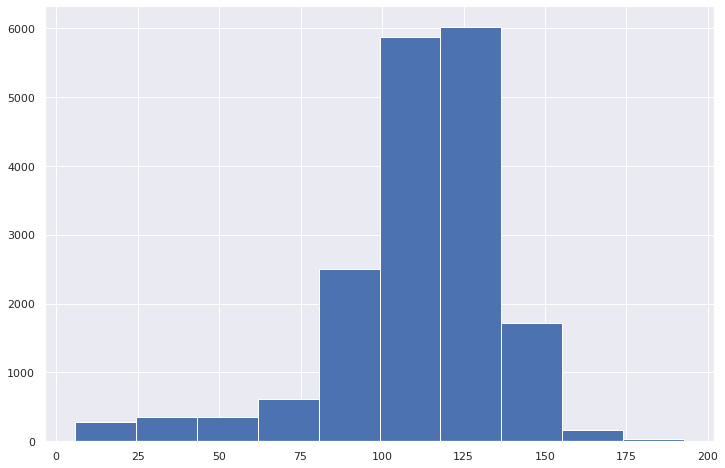

In [27]:
stars['mean_profile'].hist()

## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [28]:
#Padronizando a variável mean_profile
df_q4 = stars[stars['target'] == 0]
false_pulsar_mean_profile_standardized = (df_q4['mean_profile'] - df_q4['mean_profile'].mean()) / df_q4['mean_profile'].std()
stars['false_pulsar_mean_profile_standardized'] = false_pulsar_mean_profile_standardized    

In [29]:
def q4():
    
    f = ECDF(false_pulsar_mean_profile_standardized)

    q80 = sct.norm.ppf(q = 0.8, loc = 0, scale = 1)
    q90 = sct.norm.ppf(q = 0.9, loc = 0, scale = 1)
    q95 = sct.norm.ppf(q = 0.95, loc = 0, scale = 1)
    
    return tuple(f([q80, q90, q95]).round(3))

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`? #Ela é uma curva semelhante à distribuição normal, levemente mais à direita

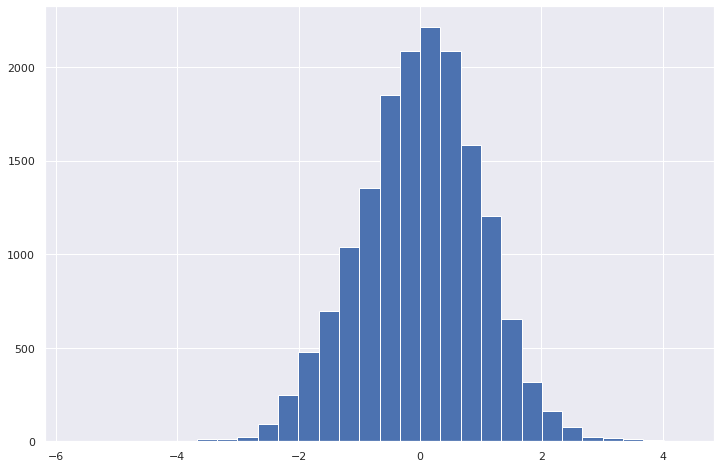

In [34]:
false_pulsar_mean_profile_standardized.hist(bins = 30)

## Questão 5

Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [35]:
def q5():
    star_quantil = stars['false_pulsar_mean_profile_standardized'].quantile([0.25, 0.5, 0.75])
    normal_quantil = [sct.norm.ppf(q = 0.25, loc = 0, scale = 1), sct.norm.ppf(q = 0.5, loc = 0, scale = 1), sct.norm.ppf(q = 0.75, loc = 0, scale = 1)]

    return tuple((star_quantil - normal_quantil).round(3))

In [36]:
q5()

(0.027, 0.04, -0.004)

Para refletir:

* Os valores encontrados fazem sentido? Sim, visualmente persebe-se que false_pulsar_mean_profile_standardized é muito semelhante à curva normal
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`? Se assemelha muito à normal
* Curiosidade: alguns testes de hipóteses sobre normalidade dos dados utilizam essa mesma abordagem.